In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [5]:
import pathlib
from PIL import Image


from google.colab import drive
drive.mount('/content/gdrive')
root_dir = pathlib.Path('/content/gdrive/MyDrive/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration')
##root_dir = pathlib.Path('https://drive.google.com/drive/folders/1wy7OGPOFUXuAHsN-I3XmfpDPaWoexXZw?usp=drive_link')


data_dir_train =pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
print(data_dir_train)
print(data_dir_test)


Mounted at /content/gdrive
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [6]:
print(data_dir_train.exists())
print(data_dir_test.exists())

True
True


In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='categorical',validation_split=0.2,subset='training',color_mode='rgb',batch_size=batch_size,image_size=(img_height, img_width),shuffle=True,seed=123)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',label_mode='categorical',validation_split=0.2,subset='validation',color_mode='rgb',batch_size=batch_size,image_size=(img_height, img_width),shuffle=True,seed=123)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [13]:
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")


Number of classes: 9


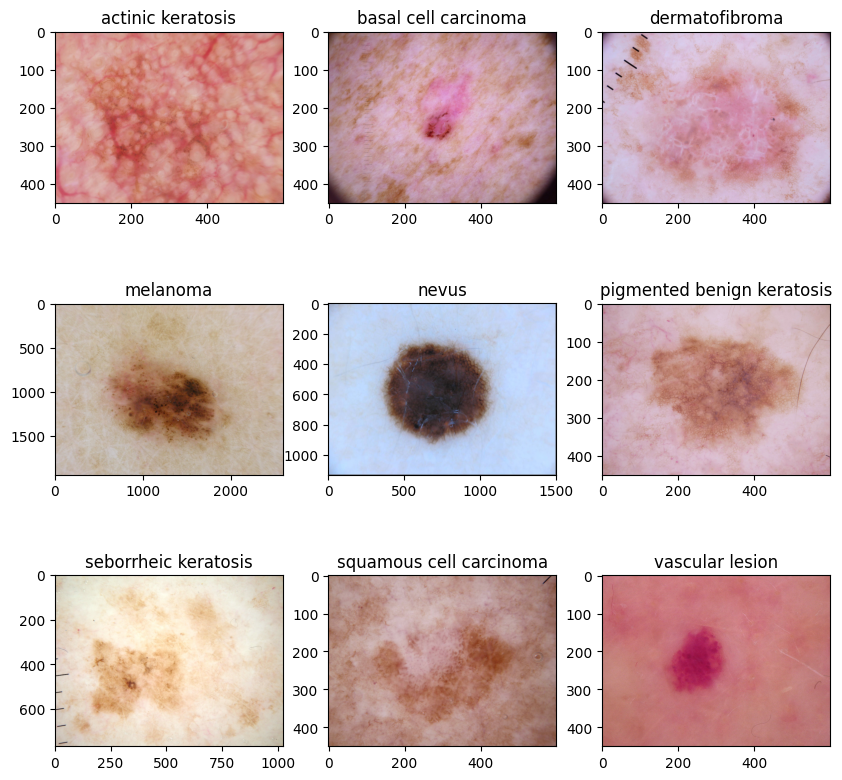

In [11]:
plt.figure(figsize=(10,10))
for i in range(9): # 9 is number of classes
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model=Sequential()
##normalization
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

#Second Convolutaion Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())

#Third Convolution Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())

#Fourth Convolution Layer
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D())
model.add(Dropout(0.25))
#Flatten Layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,133,257 (8.14 MB)

 Trainable params: 2,133,257 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1583s 5s/step - accuracy: 0.1973 - loss: 2.0797 - val_accuracy: 0.3808 - val_loss: 1.6818
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.4022 - loss: 1.5611 - val_accuracy: 0.3979 - val_loss: 1.6290
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 688s 4s/step - accuracy: 0.4622 - loss: 1.4316 - val_accuracy: 0.5056 - val_loss: 1.2840
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.5249 - loss: 1.2671 - val_accuracy: 0.5464 - val_loss: 1.1237
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 671s 4s/step - accuracy: 0.5593 - loss: 1.1640 - val_accuracy: 0.5880 - val_loss: 1.1466
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 689s 4s/step - accuracy: 0.6562 - loss: 0.9070 - val_accuracy: 0.6288 - val_loss: 1.0088
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 679s 4s/step - accuracy: 0.6990 - loss: 0.8157 - val_accuracy: 0.6860 - val_loss: 0.8365
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.7496 - loss: 0.6770 - val_acc

### Visualizing training results

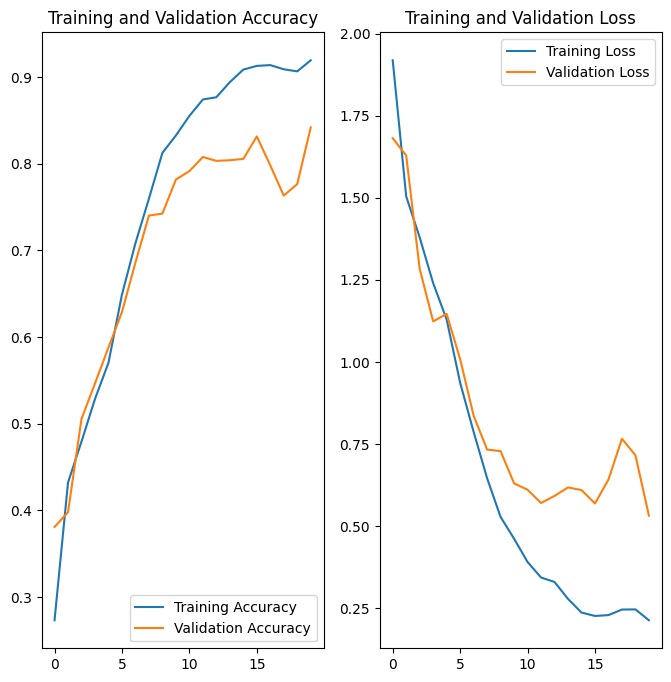

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Training Performance: The training accuracy steadily improves, nearing 1.0, while the training loss reduces significantly, indicating the model is learning well on the training data.

Validation Performance: Validation accuracy follows the trend of training accuracy but fluctuates after epoch 10, suggesting overfitting might begin. The validation loss also shows spikes after epoch 10.

Overfitting Signs: The divergence between training and validation metrics after epoch 10 implies overfitting

## Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

In [15]:
augmentation_data= keras.Sequential([layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
                                     layers.RandomRotation(0.1),
                                     layers.RandomZoom(0.1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


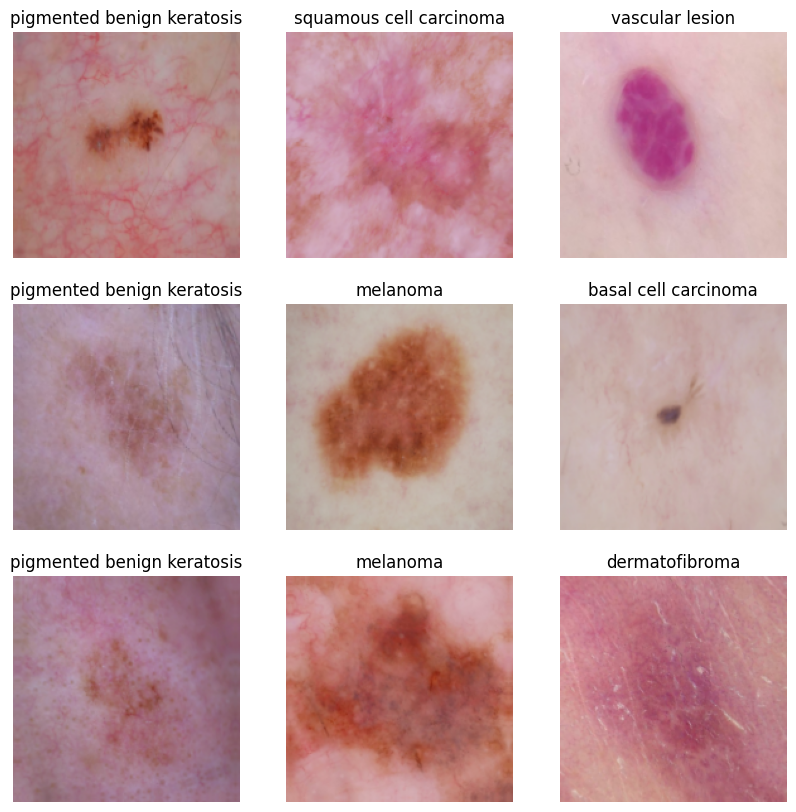

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)  # Assuming augmentation_data is a function that processes the images
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[i].numpy().astype('uint8'))  # Use i to index the augmented images
        label_index = tf.argmax(labels[i]).numpy()  # Convert one-hot encoded label to an integer
        plt.title(class_names[label_index])  # Display the label as title
        plt.axis('off')


### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2=Sequential()
#augmentation data
model2.add(augmentation_data)
##rescaling
model2.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Second Convolutaion Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Third Convolution Layer
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
#Fourth Convolution Layer
model2.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
#Flatten Layer
model2.add(Flatten())  # Flatten the convolutional output
model2.add(Dense(128, activation='relu'))  # Add a fully connected layer
model2.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

### Compiling the model

In [18]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,133,257 (8.14 MB)

 Trainable params: 2,133,257 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 165s 938ms/step - accuracy: 0.1971 - loss: 2.0873 - val_accuracy: 0.3482 - val_loss: 1.8320
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.3928 - loss: 1.6309 - val_accuracy: 0.4113 - val_loss: 1.4647
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.4291 - loss: 1.5065 - val_accuracy: 0.4722 - val_loss: 1.3695
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.4378 - loss: 1.4809 - val_accuracy: 0.4640 - val_loss: 1.4082
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.4842 - loss: 1.3286 - val_accuracy: 0.5048 - val_loss: 1.2641
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.4973 - loss: 1.2921 - val_accuracy: 0.5538 - val_loss: 1.1518
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.5380 - loss: 1.2057 - val_accuracy: 0.5301 - val_loss: 1.2471
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.5376 - loss: 1.1684 

### Visualizing the results

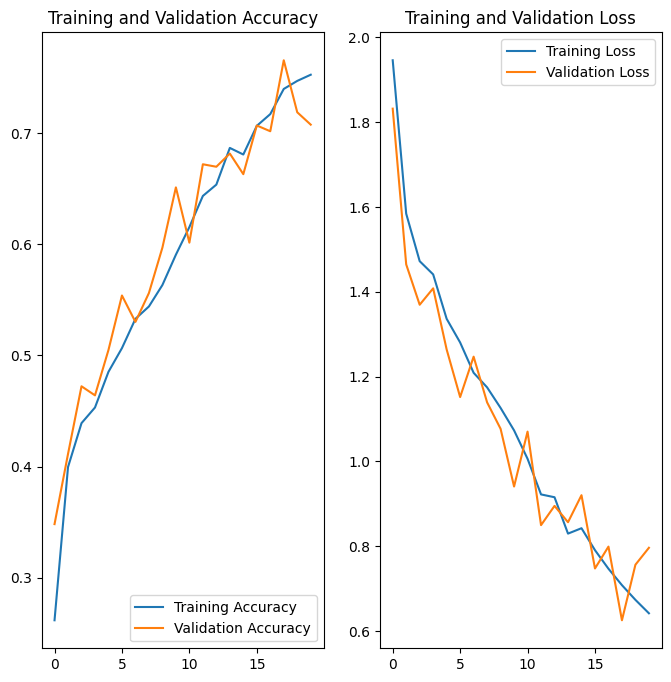

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Training accuracy improves steadily over epochs.
Validation accuracy shows fluctuations but generally follows the trend of training accuracy.
This suggests the model is learning but might be slightly overfitting, as the validation accuracy is less stable.
Training loss decreases consistently, indicating proper optimization.
Validation loss also decreases but shows fluctuations, suggesting potential overfitting

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:

# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Iterate through each subfolder (class) in the directory
for class_dir in data_dir_train.iterdir():
    if class_dir.is_dir():  # Check if it's a directory (class)
        class_name = class_dir.name  # Name of the class
        num_images = len(list(class_dir.glob("*.jpg")))  # Count the number of .jpg files
        class_counts[class_name] = num_images

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [15]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [17]:

#path_to_training_dataset=pathlib.Path("/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
import Augmentor
for i in class_names:
   p = Augmentor.Pipeline(data_dir_train  / i)
   p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
   p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CDF42BA9D80>: 100%|██████████| 500/500 [00:17<00:00, 28.05 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CDF40E57E80>: 100%|██████████| 500/500 [00:18<00:00, 27.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CDF3C41CB50>: 100%|██████████| 500/500 [00:20<00:00, 24.57 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x540 at 0x7CDF3C6F1510>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7CDF40DECBB0>: 100%|██████████| 500/500 [01:20<00:00,  6.23 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CDF41ACEBF0>: 100%|██████████| 500/500 [00:19<00:00, 25.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CDF3C5BC430>: 100%|██████████| 500/500 [00:39<00:00, 12.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CDF41ACF1F0>: 100%|██████████| 500/500 [00:20<00:00, 24.44 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7CDF41E25E10>: 100%|██████████| 500/500 [00:18<00:00, 26.64 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [18]:
#data_dir_train = pathlib.Path("/Users/arunprakash/Desktop/python/practise/CNN-Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [19]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000280.jpg_319abe0b-26fd-4693-81e9-0855301496e5.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000298.jpg_0501e908-33f4-439b-904c-4f6a5df5d17e.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011057.jpg_d4c4cc60-75a5-4c61-99ea-210700bc0d6d.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000300.jpg_b7a33a7b-f9a0-4d09-973d-27e259d7ec0b.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010803.jpg_386c2e05-609b-4e54-b60c-b7e454db5f07.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International

In [20]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [21]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [22]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [23]:
new_df['Label'].value_counts()

,count
Label,
melanoma,500
seborrheic keratosis,500
dermatofibroma,500
vascular lesion,500
basal cell carcinoma,500
pigmented benign keratosis,500
nevus,500
actinic keratosis,500
squamous cell carcinoma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [24]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [28]:
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [29]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [30]:
model3=Sequential()
##rescaling-Normalisation
model3.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#First Convulation Layer
model3.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolutaion Layer
model3.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
#Third Convolution Layer
model3.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
#Fourth Convolution Layer
model3.add(Conv2D(256,kernel_size=(11,11),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.5))
#Flatten Layer
model3.add(Flatten())  # Flatten the convolutional output
model3.add(Dense(256, activation='relu'))  # Add a fully connected layer
model3.add(Dropout(0.25))
model3.add(Dense(128, activation='relu'))  # Add a fully connected layer
model3.add(Dropout(0.25))
model3.add(Dense(64, activation='relu'))  # Add a fully connected layer
model3.add(Dropout(0.25))
model3.add(Dense(len(class_names), activation='softmax'))  # Output layer for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [31]:
## your code goes here
from tensorflow.keras.callbacks import ReduceLROnPlateau
learn_control=ReduceLROnPlateau(monitor='val_accuracy',patience=5)
model3.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 256)         │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,930,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,030,281 (45.89 MB)

 Trainable params: 12,030,281 (45.89 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [32]:
#epochs = 30
## Your code goes here, use 50 epochs.
epochs = 50
history=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=[learn_control]
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 64s 301ms/step - accuracy: 0.1261 - loss: 2.2896 - val_accuracy: 0.1403 - val_loss: 2.1910 - learning_rate: 0.0010
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.1493 - loss: 2.1800 - val_accuracy: 0.1418 - val_loss: 2.1818 - learning_rate: 0.0010
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 239ms/step - accuracy: 0.1311 - loss: 2.1821 - val_accuracy: 0.1425 - val_loss: 2.1849 - learning_rate: 0.0010
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.1559 - loss: 2.1733 - val_accuracy: 0.1463 - val_loss: 2.1917 - learning_rate: 0.0010
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 245ms/step - accuracy: 0.1422 - loss: 2.1691 - val_accuracy: 0.1804 - val_loss: 2.1126 - learning_rate: 0.0010
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 81s 241ms/step - accuracy: 0.1992 - loss: 2.0810 - val_accuracy: 0.2628 - val_loss: 1.9609 - learning_rate: 0.0010
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.2

#### **Todo:**  Visualize the model results

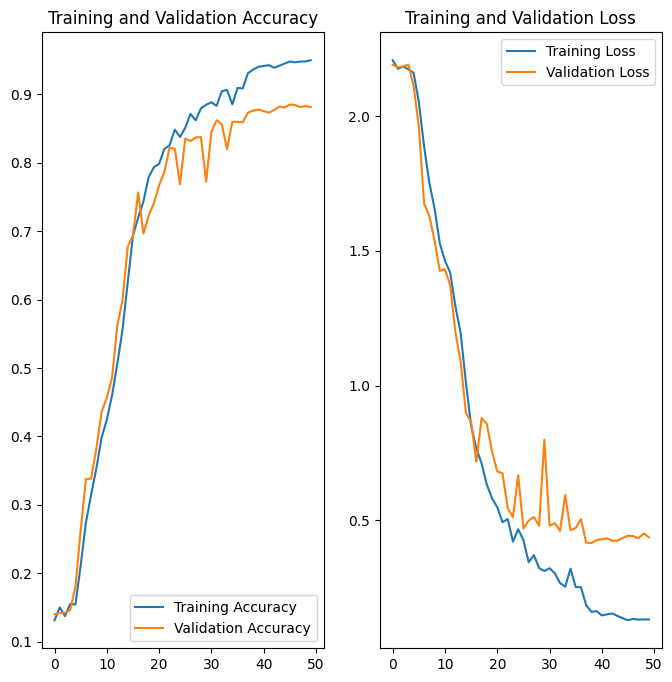

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



With data augmentation added, the graph show that the validation loss is still rising and fluctuating, while validation accuracy remains relatively flat. This indicates that although augmentation is adding some variety, it hasn’t fully resolved the overfitting or the model's inability to generalize well on validation data.